In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


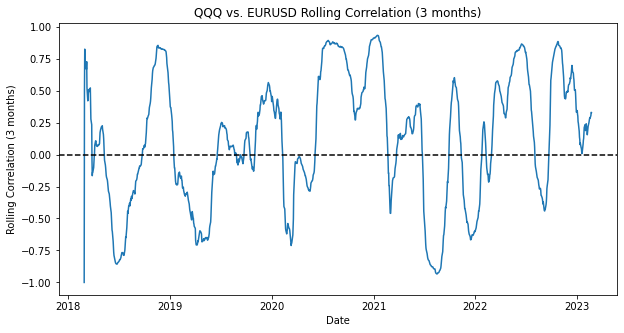

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# get historical data for QQQ and EURUSD for the past 5 years
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
qqq = yf.download("QQQ", start=start_date, end=end_date)
eurusd = yf.download("EURUSD=X", start=start_date, end=end_date)

# join the closing prices of QQQ and EURUSD into a single dataframe
df = pd.concat([qqq['Close'], eurusd['Close']], axis=1)
df.columns = ['QQQ', 'EURUSD']

# calculate the rolling correlation between the two assets
rolling_corr = df['QQQ'].rolling('90D').corr(df['EURUSD'])

# plot the rolling correlation on a graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(rolling_corr.index, rolling_corr.values)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Correlation (3 months)')
ax.set_title('QQQ vs. EURUSD Rolling Correlation (3 months)')
plt.show()

In [7]:
# calculate the entire time frame correlation between the two assets
corr = df.corr(method='pearson')

# print the correlation coefficient
print("Correlation coefficient between QQQ and EURUSD:", corr.iloc[0, 1])

Correlation coefficient between QQQ and EURUSD: 0.008583906398294794
